The Euler Method
================

This notebook is a introduction to the *Euler Method*.

Imagine you have a system described by a "state" **s**. The idea is that **s** is the collection of all the variables that are needed to specify the system's condition at some moment in time. If you know **s** at some time, then you know all you need to know to understand what the system is doing at that time. The idea is that there is some rule that determines the rate of change of **s** that depends on **s**, and possibly also on the time like so:

$$\frac{ds}{dt} = f_s(s,t)$$
    
So.. if we have a rule like this, and we know the state of the system now, Euler's method allows us to estimate the state at a later time. How? Simple.. $f_s(s,t)$ is telling us the rate of change of **s** itself. So, if a short period of time $\Delta t$ passes what should be the corresponding change in s (called $\Delta s$)?

$$\frac{\Delta s}{\Delta t} \approx \frac{ds}{dt} = f_s(s,t)$$

Solving for $\Delta{s}$ gives:

$$\Delta s \approx f_s(s,t) \Delta t$$

That's the *Euler Method*! The only thing left is to add $\Delta s$ to the old value of **s**, and repeat the process many times until you get the value of s at some later time.

$$s_{\rm new} = s_{\rm old} + \Delta s$$
    
Let's work out a detailed example 'by hand'...

Example: Decay
--------------

First.. the worlds simplest example: Radioactive Decay. In radioactive decay the rate of decay is proportional to the number of radioactive nuclei in the sample at any given time.

**s** = number of nuclei left

$$\frac{ds}{dt} = f_s(s,t) = - \lambda s$$
    
Let's say we start with s=100 nuclei, $\lambda=0.01$ (1 per 100 seconds of time per source nucleon). How many nuclei will be left after 10 seconds?  

$\frac{ds}{dt}$ will be $-\lambda s = -(0.01 s^{-1})(100n) = -1 n/s$

$s + \Delta s = 100n + (-1n/s) (10s) = 90$ nuclei remaining.

Below is the simplest python program that implements this calculation and prints the results


In [1]:
#
# Simple python program to calculate s as a function of t. 
# Any line that begins with a '#' is a comment.
# Anything in a line after the '#' is a comment.
#

lam=0.01            # define some variables: lam, dt, s, s0 and t. Set initial values.
dt=1.0
s=s0=100.0
t=0.0

def f_s(s,t):         # define a function that describes the rate of change of 's'
    return -lam*s

print ('t     s')     # print a header for the table of data
for i in range(11):
    print (t,s)       # iterate through 11 steps, starting at 0
    ds = f_s(s,t)*dt  # compute the change in 's' using the 'rule' that ds/dt = f(s,t)
    s = s + ds      # update s
    t = t + dt      # update t


t     s
0.0 100.0
1.0 99.0
2.0 98.01
3.0 97.02990000000001
4.0 96.05960100000001
5.0 95.09900499000001
6.0 94.14801494010001
7.0 93.20653479069901
8.0 92.27446944279203
9.0 91.3517247483641
10.0 90.43820750088047


Now lets add a plot. Turn on the "pylab" environment:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

Good! Next collect some lists of data (slist and tlist) and use the "plot" function to display the values graphically.

In [3]:
slist=[]
tlist=[]

lam=0.01
dt=1.0
s=s0=100.0
t=0.0

tlist.append(t)
slist.append(s)

print ('t     s')
for i in range(11):
    s += f_s(s,t)*dt
    t += dt
    tlist.append(t)
    slist.append(s)

#plot(tlist, slist, 'b.', tlist, 100.0*exp(-lam*array(tlist)))
print ("tlist=", tlist)
print ("slist=", slist)

exact = s0*np.exp(-lam*np.array(tlist))
print ("exact", exact)

t     s
tlist= [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
slist= [100.0, 99.0, 98.01, 97.02990000000001, 96.05960100000001, 95.09900499000001, 94.14801494010001, 93.20653479069901, 92.27446944279203, 91.3517247483641, 90.43820750088047, 89.53382542587165]
exact [100.          99.00498337  98.01986733  97.04455335  96.07894392
  95.12294245  94.17645336  93.23938199  92.31163464  91.39311853
  90.4837418   89.58341353]


 Now, during the "in class" work time this week we'll pretty this up and compare to our analytical solution.

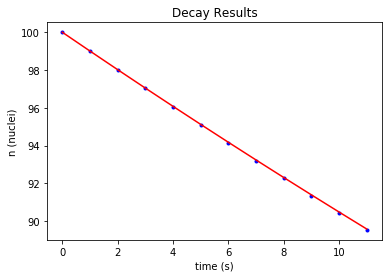

In [4]:
pl.title('Decay Results')
pl.xlabel('time (s)')
pl.ylabel('n (nuclei)')
pl.plot(tlist, slist, 'b.', tlist, exact, 'r-')

# Below are two project options. 

You should be aware that for every project in this course you can *always* create your own
project studying your own favorite topic so long as the project uses the same computational 
approach that we're exploring in a given week (e.g., the Euler Algorithm, etc.).

Project 1, version A: The Euler Method
============================

Use the Euler method to estimate parameters of a free fall model.

Using data from this slide: [https://physlets.org/tracker/download/air_resistance.pdf](https://physlets.org/tracker/download/air_resistance.pdf)

And the following model:

$$ +b v^2 - m g = m \frac{dv}{dt}$$

Assuming the mass is $m\approx 3.5\,{\rm g}$ and $g\approx 9.8\,{\rm m/s}$, estimate the value of the parameter $b$.

Below you will find most of the code already worked out as a detailed example. You need to read the code and understand what it's doing. If you have questions, **ASK!**


In [5]:
#
# Here is the raw data for the position of the muffin cup as a function of time. Use the "split" function to break it into
# a list of (possibly empty) strings.
#

data = """0.000000000E0	-2.688162330E0
3.336670003E-2	-4.301059729E0
6.673340007E-2	-5.376324661E0
1.001001001E-1	-6.989222059E0
1.334668001E-1	-1.129028179E1
1.668335002E-1	-1.451607658E1
2.002002002E-1	-2.043003371E1
2.335669002E-1	-2.526872591E1
2.669336003E-1	-3.118268303E1
3.003003003E-1	-3.870953756E1
3.336670003E-1	-4.623639208E1
3.670337004E-1	-5.430087907E1
4.004004004E-1	-6.236536606E1
4.337671004E-1	-7.150511799E1
4.671338005E-1	-8.010723744E1
5.005005005E-1	-8.924698937E1
5.338672005E-1	-9.892437376E1
5.672339006E-1	-1.080641257E2
6.006006006E-1	-1.177415101E2
6.339673006E-1	-1.274188945E2
6.673340007E-1	-1.370962788E2
7.007007007E-1	-1.467736632E2
7.340674007E-1	-1.575263126E2
7.674341008E-1	-1.672036969E2
8.008008008E-1	-1.768810813E2
8.341675008E-1	-1.865584657E2
8.675342009E-1	-1.973111150E2
9.009009009E-1	-2.075261319E2
9.342676009E-1	-2.182787812E2
9.676343010E-1	-2.284937981E2
""".splitlines()  # split this string on the "newline" character.

print("We have", len(data), "data points.")


We have 30 data points.


In [6]:
#
# Here we'll take the list of strings defined above and break it into actual numbers in reasonable units.
#

tlist = []
ylist = []
for s in data:
    t,y = s.split()     # break string in two
    t=float(t)          # convert time to float
    y=float(y)/100.0    # convert distanct (in meters) to float
    tlist.append(t)
    ylist.append(y)
        
print ("tlist=",tlist)
print ("ylist=",ylist)


tlist= [0.0, 0.03336670003, 0.06673340007, 0.1001001001, 0.1334668001, 0.1668335002, 0.2002002002, 0.2335669002, 0.2669336003, 0.3003003003, 0.3336670003, 0.3670337004, 0.4004004004, 0.4337671004, 0.4671338005, 0.5005005005, 0.5338672005, 0.5672339006, 0.6006006006, 0.6339673006, 0.6673340007, 0.7007007007, 0.7340674007, 0.7674341008, 0.8008008008, 0.8341675008, 0.8675342009, 0.9009009009, 0.9342676009, 0.967634301]
ylist= [-0.0268816233, -0.04301059729, -0.05376324661, -0.06989222059, -0.1129028179, -0.1451607658, -0.2043003371, -0.2526872591, -0.3118268303, -0.3870953756, -0.4623639208, -0.5430087907, -0.6236536606, -0.7150511799, -0.8010723744, -0.8924698937, -0.9892437376, -1.0806412570000001, -1.177415101, -1.274188945, -1.370962788, -1.4677366319999998, -1.575263126, -1.672036969, -1.768810813, -1.865584657, -1.97311115, -2.075261319, -2.182787812, -2.284937981]


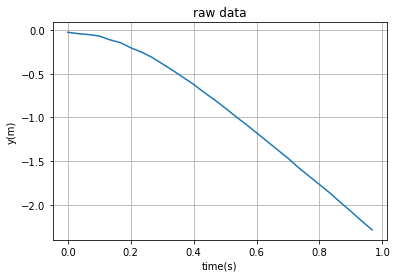

In [10]:
pl.plot(tlist, ylist)
pl.title("raw data")
pl.xlabel("time(s)")
pl.ylabel("y(m)")
pl.grid()

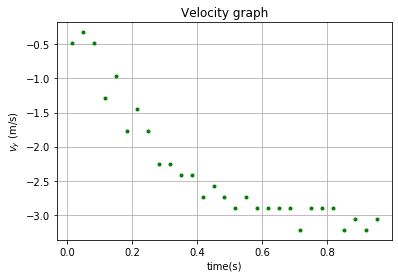

In [19]:
vlist = []  # Velocity list (computed velocities from experimental data)
tvlist = []  # time list (times for corresponding velocities)
for i in range(1,len(tlist)):
    dy=ylist[i]-ylist[i-1]
    dt=tlist[i]-tlist[i-1]
    vlist.append(dy/dt)
    tvlist.append((tlist[i]+tlist[i-1])/2.0)
    
pl.plot(tvlist,vlist,'g.')
pl.title("Velocity graph")
pl.xlabel("time(s)")
pl.ylabel("$v_y$ (m/s)")
pl.grid()

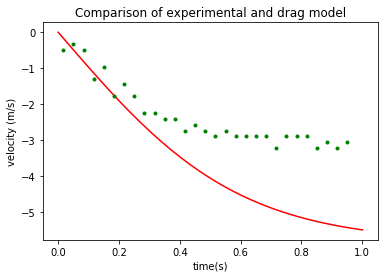

In [21]:
m=0.0035  # kg
g=9.8     # m/s
b=0.001    # total guess, need to improve

v=0.0     # start with zero velocity

dt = (tlist[-1]-tlist[0])/(len(tlist)-1)  # time per frame in original video
t=0.0

vclist = [v]
tclist = [t]

def deriv(v, t):
    return b*v**2/m - g

for i in range(len(tlist)):
    dv = deriv(v,t)*dt
    v += dv
    t += dt
    
    vclist.append(v)
    tclist.append(t)
    
pl.title("Comparison of experimental and drag model")
pl.xlabel("time(s)")
pl.ylabel("velocity (m/s)")
pl.plot(tclist, vclist, 'r-',tvlist,vlist,'g.')


So, clearly our initial guess of "b" was too small, try again!..

ALSO, **bonus points** if you work out the analytical solution for $v(t)$ and compare that with the Euler Model result.


Project 1, version B: The Euler Method
============================

Come up with any system of your own devising that can be studied using the Euler Algorithm. Basically
this is any system where the behavior can be described using a first order differential equation.
This include lots of interesting proplems! Dig around a little and find something you're interested
in and use that. As long as you use the Euler Algorithm, it'll be fine.

